<a href="https://colab.research.google.com/github/mashnoor3/data-science-portfolio/blob/main/Telecom_Customer_Churn_EDA_and_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import relevant Python packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly
# import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
# Install dependendencies to connect to Google Cloud Storage
!pip -q install fsspec # File-system specification
!pip -q install gcsfs # Convenient Filesystem interface over GCS

     |████████████████████████████████| 102kB 5.2MB/s 
     |████████████████████████████████| 1.3MB 10.3MB/s 
     |████████████████████████████████| 143kB 17.5MB/s 
     |████████████████████████████████| 296kB 25.1MB/s 


In [3]:
# Load data from csv file stored in Google Cloud Storage
gs_bucket = 'gs://mashnoor-data-science-portfolio/'
df = pd.read_csv(gs_bucket + 'WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='utf-8')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Total number of customers (rows) in the dataset =  7043

Number of missing data for each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Number of duplicate rows: 0 

Looking at the overall churn rate


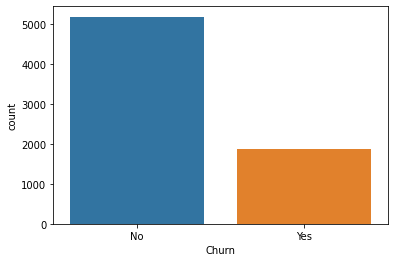

In [4]:
# Initial data review
display(df.head())  
display(df.info())  
display(df.describe())  
print('Total number of customers (rows) in the dataset = ', df.shape[0])
print('\nNumber of missing data for each column:\n{}'.format(df.isna().sum()))
print('\nNumber of duplicate rows: {} \n'.format(df.duplicated().sum()))

print("Looking at the overall churn rate")
ax = sns.countplot(x='Churn',data=df)

# Data Exploration: Analyze the dataset and summarize results 

1. Describe the customer profile of customer 6467-CHFZW (Tenure, gender, services they have with the company, contract type, if they are signed up for paperless billing, their payment method and total charges) 
> We see the information for customer customer 6467-CHFZW below. Mainly the points of interest are: 
> - Customer with ID 6467-CHFZW is a male and has been tenured for 47 years.  
> - The services that the customer has with the company are: phone service, fiber optic for internet service, online backup, streaming TV, and steaming movie.  
> - They are signed up for paperless billing, and the payment method is electronic check.  
The total charge for the customer is 4749.15 (note that units for charge are not specified.  
2. What is the average monthly charge for customers by gender? 
> - Average montly charge for males: 64.32748241912773
> - Average montly charge for females: 65.20424311926602
3. Create appropriate visualizations to summarize the tenure of customers by age and services they have with the company.
> Visualizations of each service with respect to tenure are shown below.

In [5]:
df.mean(axis=0)
display(df[df['customerID']=='6467-CHFZW'])
print("Average montly charge for males: {}".format(df[df['gender']=='Male']['MonthlyCharges'].mean()))
print("Average montly charge for females: {}".format(df[df['gender']=='Female']['MonthlyCharges'].mean()))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes


Average montly charge for males: 64.32748241912773
Average montly charge for females: 65.20424311926602


In [6]:
fig1 = px.histogram(df, 
                    x="tenure", 
                    color= "Contract", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Month-to-month':'#73C6B6','One year':'#D98880', 'Two year':'#85C1E9'})
fig1.update_layout(title_text='Contract Type vs Tenure Age',title_x=0.5)

fig2 = px.histogram(df, 
                    x="tenure", 
                    color= "OnlineSecurity", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Yes':'#73C6B6','No':'#D98880', 'No internet service':'#85C1E9'})
fig2.update_layout(title_text='Online Security vs Tenure Age',title_x=0.5)

fig3 = px.histogram(df, 
                    x="tenure", 
                    color= "PhoneService", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Yes':'#73C6B6','No':'#D98880'})
fig3.update_layout(title_text='Phone Service vs Tenure Age ',title_x=0.5)

fig4 = px.histogram(df, 
                    x="tenure", 
                    color= "OnlineBackup", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Yes':'#73C6B6','No':'#D98880', 'No internet service':'#85C1E9'})
fig4.update_layout(title_text='Online Backup vs Tenure Age',title_x=0.5)

fig5 = px.histogram(df, 
                    x="tenure", 
                    color= "DeviceProtection", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Yes':'#73C6B6','No':'#D98880', 'No internet service':'#85C1E9'})
fig5.update_layout(title_text='Device Protection vs Tenure Age',title_x=0.5)

fig6 = px.histogram(df, 
                    x="tenure", 
                    color= "TechSupport", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Yes':'#73C6B6','No':'#D98880', 'No internet service':'#85C1E9'})
fig6.update_layout(title_text='Tech Support vs Tenure Age',title_x=0.5)

fig7 = px.histogram(df, 
                    x="tenure", 
                    color= "StreamingTV", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Yes':'#73C6B6','No':'#D98880', 'No internet service':'#85C1E9'})
fig7.update_layout(title_text='Streaming TV vs Tenure Age',title_x=0.5)

fig8 = px.histogram(df, 
                    x="tenure", 
                    color= "StreamingMovies", 
                    range_x=[0, 75],
                    range_y=[0, 700],
                    color_discrete_map={'Yes':'#73C6B6','No':'#D98880', 'No internet service':'#85C1E9'})
fig8.update_layout(title_text='Streaming Movies vs Tenure Age',title_x=0.5)

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()

# Data Preparation and Feature Engineering

1. Identify the target(s) and features that you would use for the task of predicting customer churn using the data source. Comment on how well the features are related to the target and provide any visualization/summary statistics 
> Using a correlation matrix we can see that contract type of month-to-month, internet service of fiber optic, and monthly charges are positively correlated with churn. While tenure age, no internet service, and contract type of two year are negatively correlated with churn. 
2. Prepare features for your model. Please identify what methods were used for which features and why (eg: new feature engineering, scaling, normalization, one hot encoding, dimensionality reduction etc.) 
> First we need to convert total charges to a numeric data type (float), and then delete rows with missing data (total charges missing on 11 rows). Next one hot encoding for all the categorical variables. Finally, normalization of all the features to the space 0 to 1.

3. Is there anything you’ve noticed about the target variables that may impact the model’s predictive performance? If there is an issue –  
> a) What do you think the impact will be and why?



In [7]:
# Drop customer id column
one_shot = df.drop('customerID', axis=1)
# Replace yes/no to 1/0
one_shot=one_shot.replace(to_replace=['No', 'No phone service', 'No internet service', 'Yes'], value=[0, 0, 0, 1])
# Convert total charges to float 
one_shot['TotalCharges'] = pd.to_numeric(one_shot['TotalCharges'], errors='coerce')
# Delete the rows with no TotalCharges data
one_shot.dropna(inplace = True)
# one_shot['TotalCharges'] = one_shot['TotalCharges'].fillna(0)
# One hot encode all categorical variables
one_shot = pd.get_dummies(one_shot)
display(one_shot.head())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,1,0,0,0,0,1,0


In [8]:
# Get correlation of churn with respect to all the features 
coerr = one_shot.corr()['Churn'].sort_values(ascending=False)
print("Correlation of each variable with respect to Churn\n{}".format(coerr))
# Plot the correlation 
fig = px.bar(x=coerr.index, 
             y=coerr.values,
             labels={'x':'Variables', 'y':'Correlation'})
fig.update_layout(title_text='Correlation of each variable with respect to Churn'
                  ,title_x=0.5)
fig.show()

Correlation of each variable with respect to Churn
Churn                                      1.000000
Contract_Month-to-month                    0.404565
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingTV                                0.063254
StreamingMovies                            0.060860
MultipleLines                              0.040033
PhoneService                               0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
DeviceProtection                          -0.066193
OnlineBackup                              -0.082307
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
InternetService_DSL                       -0.124141
PaymentMethod

In [9]:
from sklearn.preprocessing import MinMaxScaler

y = one_shot['Churn'].values
X = one_shot.drop(columns = ['Churn'])

# Save column names since MinMaxScaler wills remove them 
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
# Add back column names
X.columns = features

display(X.head())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Building: 
Build predictive model(s) that help predict customer churn using the features in the previous question 

1. What model(s) are you using and why did you choose the model(s)? 

2. What performance metrics are you using to assess model performance? 

3. Comment on model performance using the metrics listed in the previous question. Reminder:  provide screenshots of relevant performance metrics 

4. Comment and rationalize the generalization capabilities of your model. Note: You don’t need to resolve this in your code submission 

In [10]:
# Split dataset for train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

# Logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Mean accuracy on the given test data and label
score = log_reg.score(X_test, y_test)
print("Mean accuracy on the given test data and label: {}".format(score))

Mean accuracy on the given test data and label: 0.8042654028436019


In [14]:
# Validating logistic regression model performance with confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

_ = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}\n".format(_))
_ = classification_report(y_test, y_pred)
print("Classification report:\n{}".format(_))
_ = accuracy_score(y_test, y_pred) # same as the mean accuracy score
print("Accuracy score:\n{}".format(_))
_ = f1_score(y_test, y_pred) 
print("f1_score score:\n{}".format(_))

Confusion matrix:
[[1383  166]
 [ 247  314]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110

Accuracy score:
0.8042654028436019
f1_score score:
0.6032660902977905


In [ ]:
# Use cross validation to train so model generalizes better 
from sklearn.model_selection import cross_val_score
log_reg = LogisticRegression()
cv_results = cross_val_score(log_reg, X, y, cv=10)
print("CV results: {}".format(cv_results))
print("Mean of CV results: {}".format(np.mean(cv_results)))

CV results: [0.79574468 0.80992908 0.80425532 0.81676136 0.78125    0.79971591
 0.80965909 0.81107955 0.79829545 0.80539773]
Mean of CV results: 0.8032088168923275
